/tmp/ipykernel_104520/2754986185.py:21: UserWarning: Default value 0 (int) might not be best suitable with dtype=float64.
  nutrient_layer = PropertyLayer("nutrient",width,height,default_value=0)


[Text(0.5, 1.0, 'Nutrient distribution')]

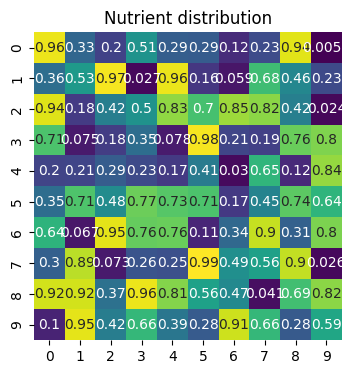

In [19]:
import mesa
from mesa.space import PropertyLayer
import numpy as np 
import seaborn as sns
import pandas as pd

class BacteriaAgent(mesa.Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
    
    def step(self):
        pass

class SimModel(mesa.Model):
    def __init__(self, width, height):
        super().__init__()
        self.num_agents = 10
        
        # Initialize Grid Properties
        self.grid = mesa.space.MultiGrid(width,height,True)
        nutrient_layer = PropertyLayer("nutrient",width,height,default_value=0)
        nutrient_layer.modify_cells(lambda x: np.random.random())
        self.grid.add_property_layer(nutrient_layer)
        
        # Initialize Scheduler
        self.schedule = mesa.time.RandomActivation(self)
       
        # Initialize Agents
        for i in range(self.num_agents):
            a = BacteriaAgent(i,self)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()
        
model = SimModel(10,10)
model.step()

nutrient_counts = np.zeros((model.grid.width, model.grid.height))
for cell_content, (x, y) in model.grid.coord_iter():
    
    nutrient_counts[x][y] = model.grid.properties["nutrient"].data[x][y]
g = sns.heatmap(nutrient_counts, cmap="viridis", annot=True, cbar=False, square=True)
g.figure.set_size_inches(4, 4)
g.set(title="Nutrient distribution")


[Text(0.5, 1.0, 'Agent Distribution')]

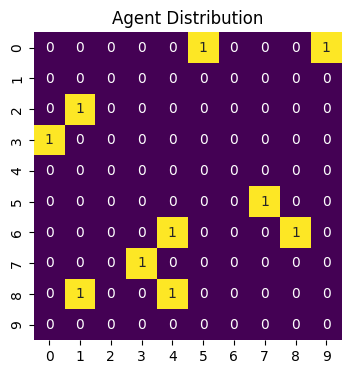

In [17]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell_content, (x, y) in model.grid.coord_iter():
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
f = sns.heatmap(agent_counts, cmap="viridis", annot=True, cbar=False, square=True)
f.figure.set_size_inches(4, 4)
f.set(title="Agent Dis")